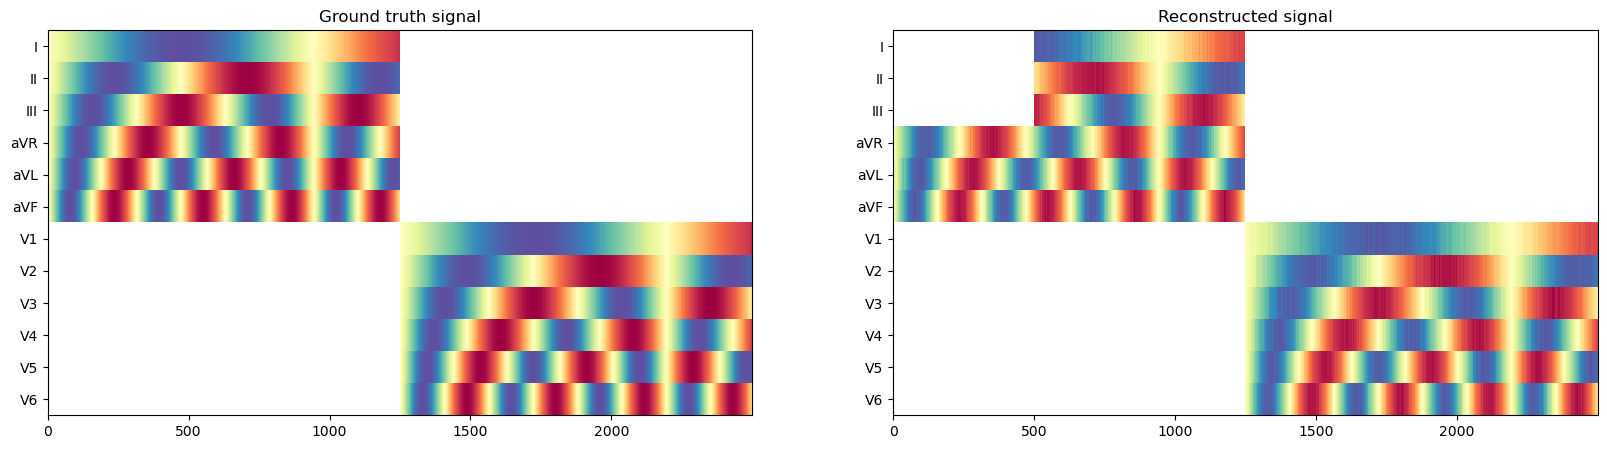

Total score: 23.816125869750977
SNR values: [11.360778 10.193045 19.405386 30.933956 31.178875 30.96626  28.991928
 30.587416 30.903698 30.779745 31.386137 30.861122]
Alpha values: [0.9]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from metric import calculate_mean_snr_batch

# Create example signals

ground_truth_signal = np.zeros((12, 2500))
ground_truth_signal[:] = np.nan
for i in range(2):
    for j in range(6):
        ground_truth_signal[i*6+j,i*1250:(i+1)*1250] = np.sin((j+1)/300*np.arange(0,1250))

reconstructed_signal = np.zeros((12, 2500))
reconstructed_signal[:] = np.nan
for i in range(2):
    for j in range(6):
        reconstructed_signal[i*6+j,i*1250:(i+1)*1250] = np.sin((j+1)/300*np.arange(0,1250)) + np.random.randn(1250)*0.02
reconstructed_signal[0:3, 0:500] = np.nan

# Plot example signals

fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(ground_truth_signal, aspect='auto', interpolation='none', cmap='Spectral')
ax[0].set_title("Ground truth signal")
ax[0].set_yticks(range(12))
ax[0].set_yticklabels(['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

ax[1].imshow(reconstructed_signal, aspect='auto', interpolation='none', cmap='Spectral')
ax[1].set_title("Reconstructed signal")
ax[1].set_yticks(range(12))
ax[1].set_yticklabels(['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
plt.show()

# Calculate SNR, alpha, etc.

ground_truth_batch = ground_truth_signal[None, ...].astype(np.float32)
reconstructed_batch = reconstructed_signal[None, ...].astype(np.float32)

total_score, snr_values, alpha_values = calculate_mean_snr_batch(reconstructed_batch, ground_truth_batch)

print(f"Total score: {total_score}")
print(f"SNR values: {snr_values.flatten()}")
print(f"Alpha values: {alpha_values.flatten()}")